In [92]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
os.chdir('C:/Users/Admin/Downloads')

### read dataset


In [93]:
data = pd.read_excel('THPTQG_Full.xlsx')

In [94]:
data

,Năm,Pointladder1,Toán,Tiếng Anh,Pointladder2,Văn,Lý,Hóa,Sinh,Sử,Địa,GDCD
0,2022,0.0,4,13,0.00,38.0,12.0,12.0,38.0,5.0,21.0,27.0
1,2022,0.2,1,0,0.25,12.0,0.0,2.0,0.0,4.0,3.0,0.0
2,2022,0.4,3,4,0.50,51.0,0.0,1.0,5.0,2.0,3.0,0.0
3,2022,0.6,6,23,0.75,65.0,1.0,8.0,6.0,14.0,7.0,0.0
4,2022,0.8,42,112,1.00,28.0,11.0,20.0,45.0,58.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
148,2020,9.2,19433,3325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,2020,9.4,11086,2253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,2020,9.6,4669,1367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,2020,9.8,1542,672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
data.shape

(153, 12)

In [96]:
data.describe()

,Năm,Pointladder1,Toán,Tiếng Anh,Pointladder2,Văn,Lý,Hóa,Sinh,Sử,Địa,GDCD
count,153.000000,153.000000,153.000000,153.00000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,2021.000000,5.000000,18360.078431,16879.24183,5.000000,22634.764228,7794.926829,7841.317073,7714.365854,15046.008130,18596.219512,12667.130081
std,0.819178,2.953588,16638.996111,14301.00102,2.970138,25560.944372,8282.803988,7604.298766,8144.928961,13047.449837,48059.478076,17756.964923
min,2020.000000,0.000000,0.000000,0.00000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2020.000000,2.400000,2370.000000,5113.00000,2.500000,790.500000,326.000000,624.500000,601.000000,2322.500000,249.000000,58.500000
50%,2021.000000,5.000000,14266.000000,16803.00000,5.000000,10833.000000,4321.000000,5998.000000,4143.000000,12253.000000,4873.000000,2083.000000
75%,2022.000000,7.600000,31210.000000,25439.00000,7.500000,44634.500000,14073.000000,13197.000000,13778.000000,27572.000000,27040.500000,21821.000000
max,2022.000000,10.000000,54495.000000,118911.00000,10.000000,80860.000000,25506.000000,27138.000000,25198.000000,38718.000000,508888.000000,57508.000000


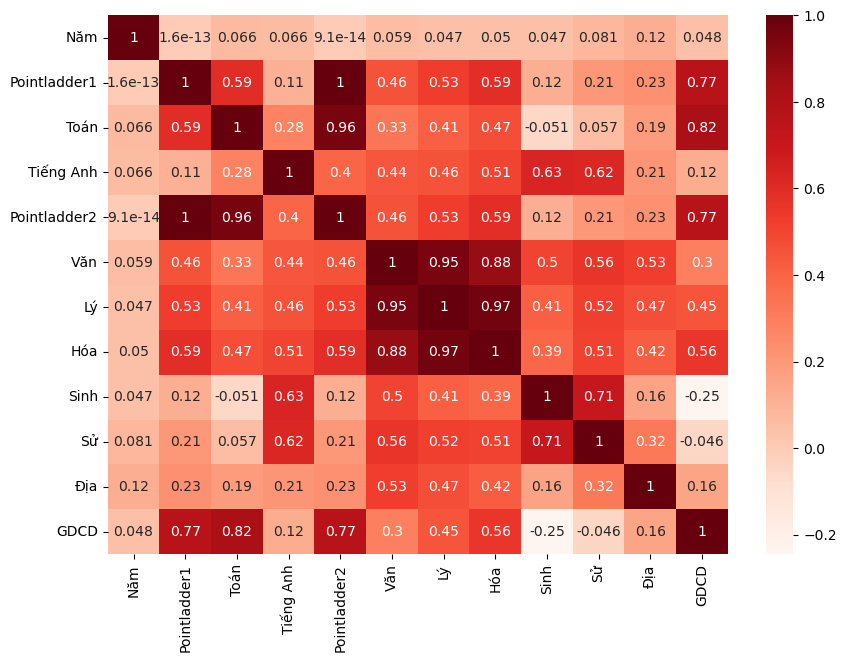

In [97]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

<Axes: >

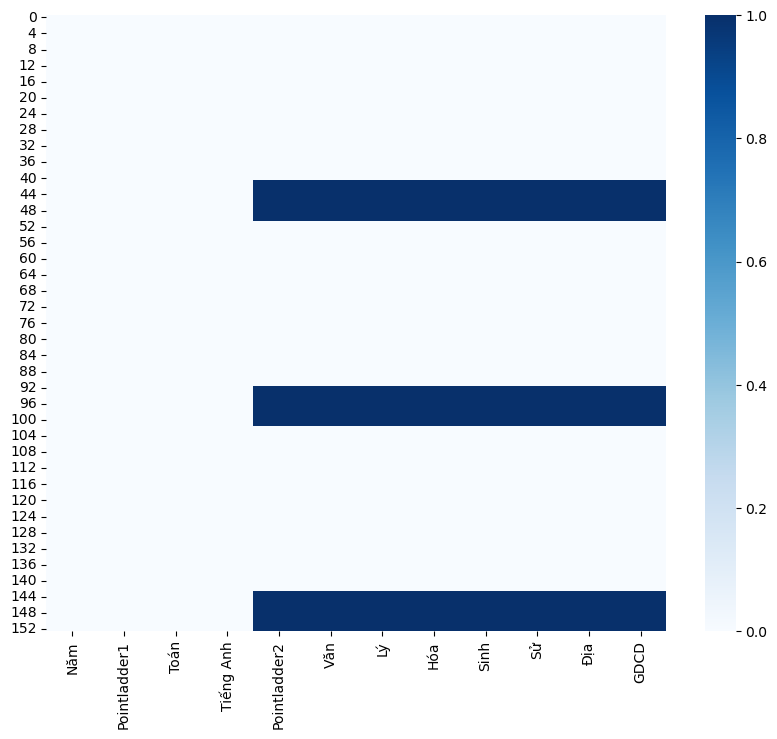

In [101]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.isna(), cmap='Blues')

### Noise data


### MISSING VALUES


In [98]:
data.isnull().values.any()

True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Năm           153 non-null    int64  
 1   Pointladder1  153 non-null    float64
 2   Toán          153 non-null    int64  
 3   Tiếng Anh     153 non-null    int64  
 4   Pointladder2  123 non-null    float64
 5   Văn           123 non-null    float64
 6   Lý            123 non-null    float64
 7   Hóa           123 non-null    float64
 8   Sinh          123 non-null    float64
 9   Sử            123 non-null    float64
 10  Địa           123 non-null    float64
 11  GDCD          123 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 14.5 KB


### Sum of null values

In [63]:
data.isnull().sum().sum()

240

### Check null values

In [64]:
data.isnull().sum()

Năm              0
Pointladder1     0
Toán             0
Tiếng Anh        0
Pointladder2    30
Văn             30
Lý              30
Hóa             30
Sinh            30
Sử              30
Địa             30
GDCD            30
dtype: int64

### Check which rows have NaNs

In [65]:
data[pd.isnull(data).any(axis=1)]

,Năm,Pointladder1,Toán,Tiếng Anh,Pointladder2,Văn,Lý,Hóa,Sinh,Sử,Địa,GDCD
41,2022,8.2,48222,14546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,2022,8.4,40654,14191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,2022,8.6,31021,13702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,2022,8.8,20796,12652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,2022,9.0,12095,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,2022,9.2,5915,9070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,2022,9.4,2540,6757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2022,9.6,926,4111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,2022,9.8,240,1824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,2022,10.0,35,475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Repalce NaN of Score 

In [67]:
data.Văn.fillna(data.Văn.mean(),inplace=True)
data.Pointladder2.fillna(data.Pointladder2.mean(),inplace=True)
data.Lý.fillna(data.Lý.mean(), inplace=True)
data.Hóa.fillna(data.Hóa.mean(), inplace=True)
data.Sinh.fillna(data.Sinh.mean(), inplace=True)
data.Sử.fillna(data.Sử.mean(), inplace=True)
data.Địa.fillna(data.Địa.mean(), inplace=True)
data.GDCD.fillna(data.GDCD.mean(), inplace=True)

In [69]:
data.isnull().sum()

Năm             0
Pointladder1    0
Toán            0
Tiếng Anh       0
Pointladder2    0
Văn             0
Lý              0
Hóa             0
Sinh            0
Sử              0
Địa             0
GDCD            0
dtype: int64

### FEATURE SCALING

<Axes: >

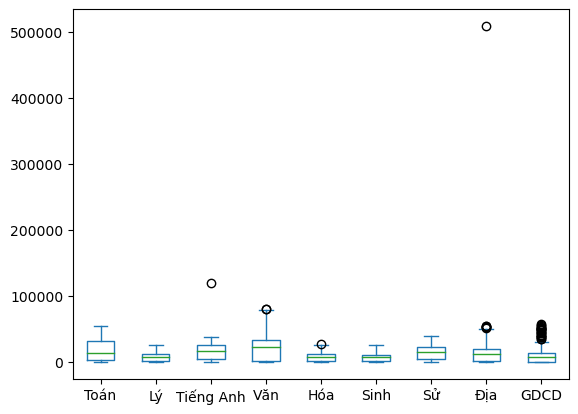

In [73]:
data[['Toán', 'Lý', 'Tiếng Anh', 'Văn', 'Hóa', 'Sinh', 'Sử', 'Địa', 'GDCD']].plot(kind='box')

In [ ]:
df=data[['Toán', 'Tiếng Anh']]

### Scaling the dataset (normalization): x_mms=(x-x_min)/(x_max - x_min)

In [77]:
mms = MinMaxScaler()
mms.fit(df)
data_mms=mms.transform(df)

In [80]:
data_mms=pd.DataFrame(data_mms, columns=['Toán', 'Tiếng Anh'])
data_mms.head(10)

,Toán,Tiếng Anh
0,0.000073,0.000109
1,0.000018,0.000000
2,0.000055,0.000034
3,0.000110,0.000193
4,0.000771,0.000942
5,0.002000,0.002279
6,0.004771,0.005702
7,0.010423,0.011555
8,0.020717,0.024615
9,0.036334,0.042999


Text(0.5, 1.0, 'data after max_min normalization')

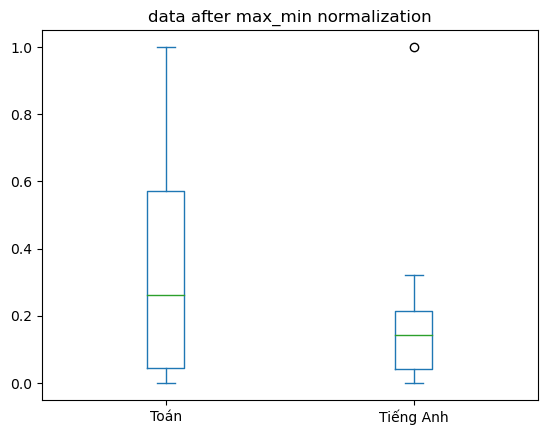

In [81]:
data_mms.plot(kind='box')
plt.title('data after max_min normalization')

### Standardization: x_stand = (x-mean(x))/StandardDeviation

In [85]:
sc = StandardScaler()
data_stand=sc.fit_transform(df)

### Convert to Dataframe

In [86]:
data_stand=pd.DataFrame(data_stand, columns=['Toán','Tiếng Anh'])
data_stand.describe()

,Toán,Tiếng Anh
count,1.530000e+02,1.530000e+02
mean,4.644070e-17,3.483053e-17
std,1.003284e+00,1.003284e+00
min,-1.107060e+00,-1.184160e+00
25%,-9.641562e-01,-8.254585e-01
50%,-2.468613e-01,-5.348731e-03
75%,7.748137e-01,6.005083e-01
max,2.178833e+00,7.158019e+00


In [87]:
data_stand.head(10)

,Toán,Tiếng Anh
0,-1.106819,-1.183248
1,-1.107000,-1.184160
2,-1.106880,-1.183879
3,-1.106699,-1.182547
4,-1.104528,-1.176303
5,-1.100488,-1.165148
6,-1.091383,-1.136595
7,-1.072812,-1.087767
8,-1.038985,-0.978817
9,-0.987672,-0.825459


### Replotting dataset after standardization

Text(0.5, 1.0, 'data after standardization')

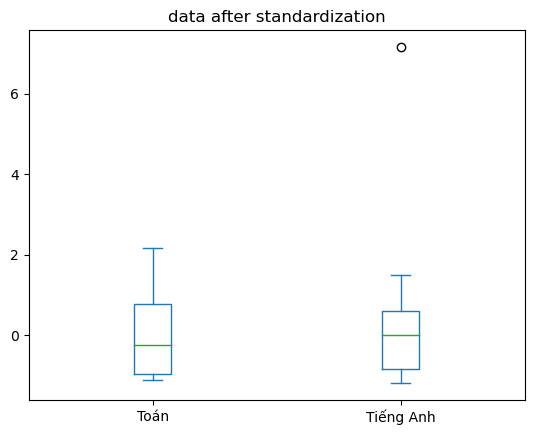

In [89]:
data_stand.plot(kind='box')
plt.title('data after standardization')